#### Allowed packages: Pandas, matplotlib, seaborn, and numpy. Sklearn is allowed only for getting the dataset.

In [1]:
!pip3 install seaborn
!pip3 install scikit-learn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from helper import *

# some data processing and feature analysis

<li> load boston house dataset </li>
<li> split train and test with ratio 1 to 3 </li>
<li> plot the target value based on 13 different features and recognize the correlation between features and
the target values. talk about them and their meanings.</li>

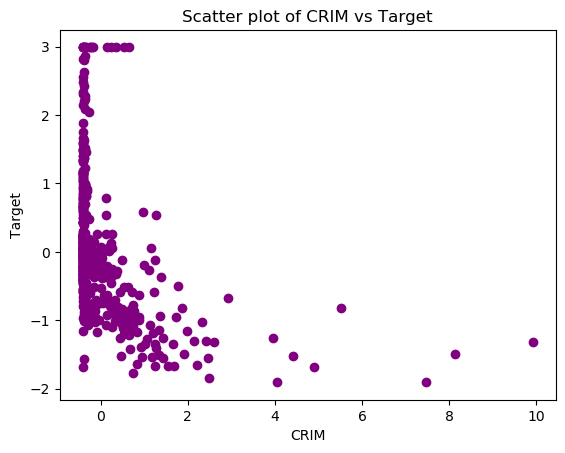

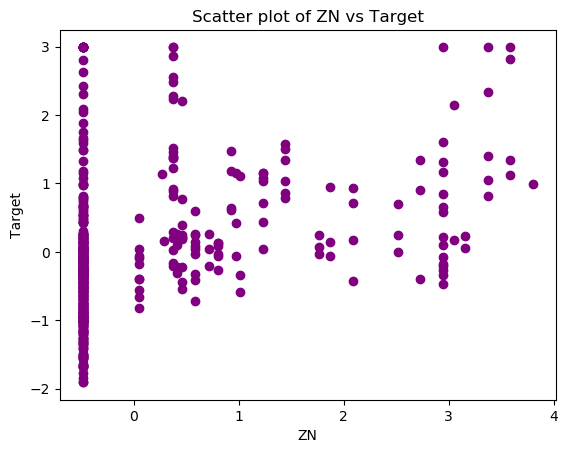

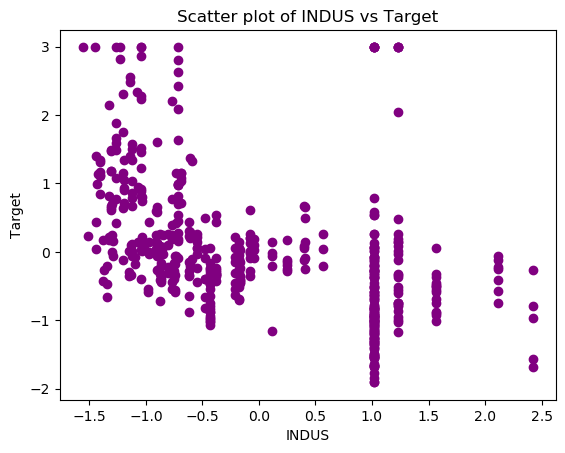

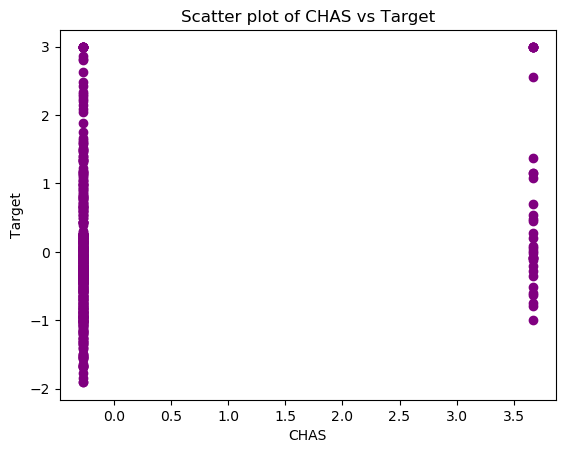

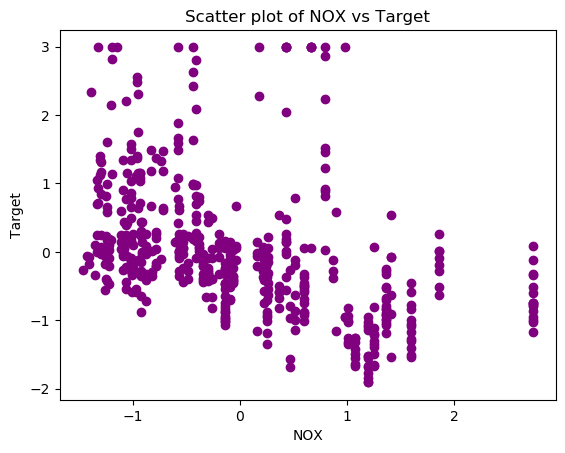

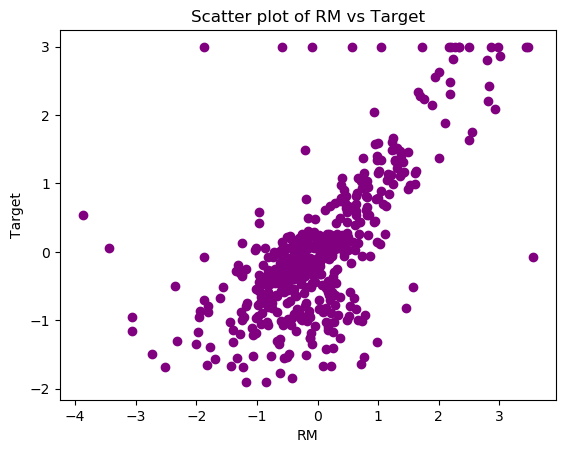

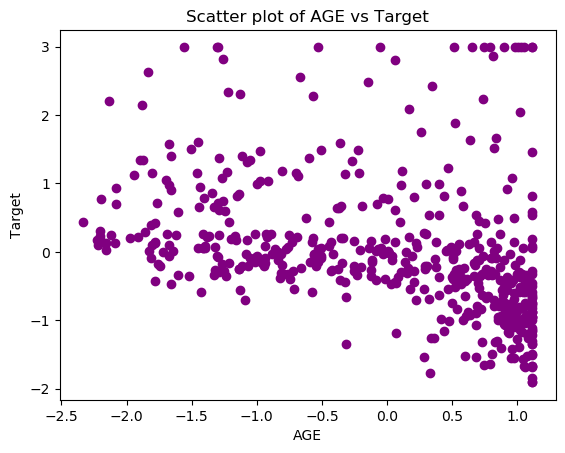

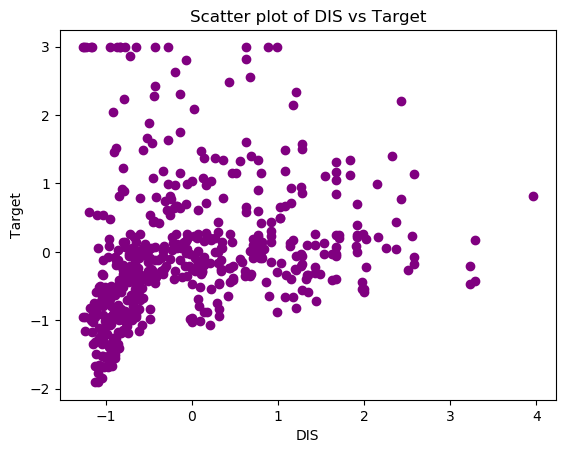

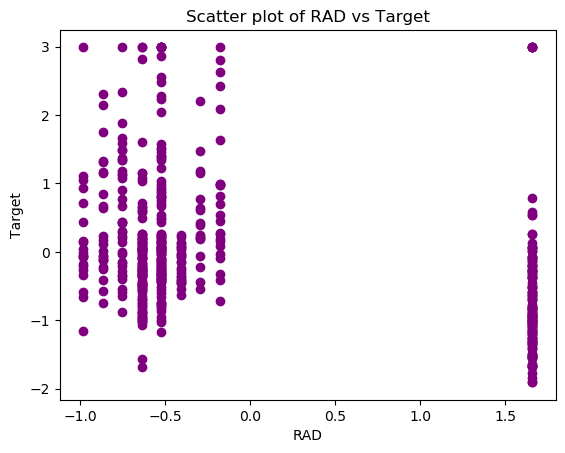

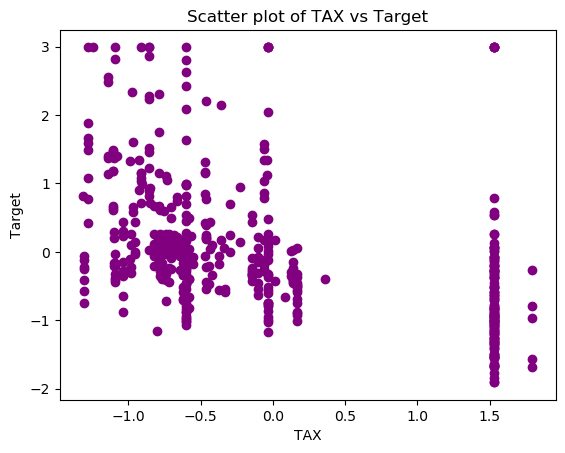

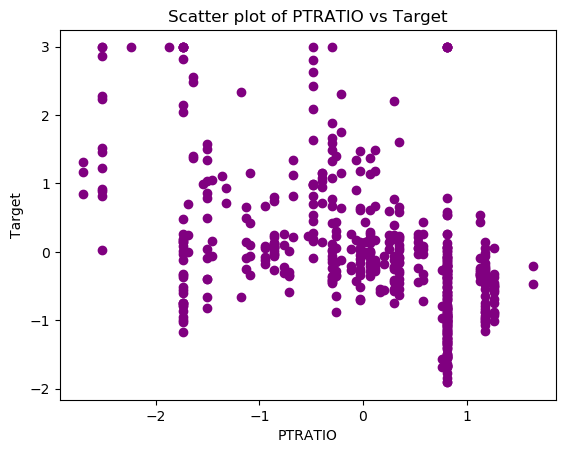

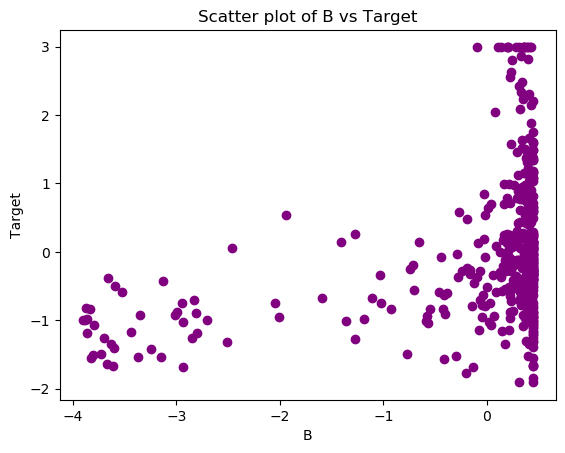

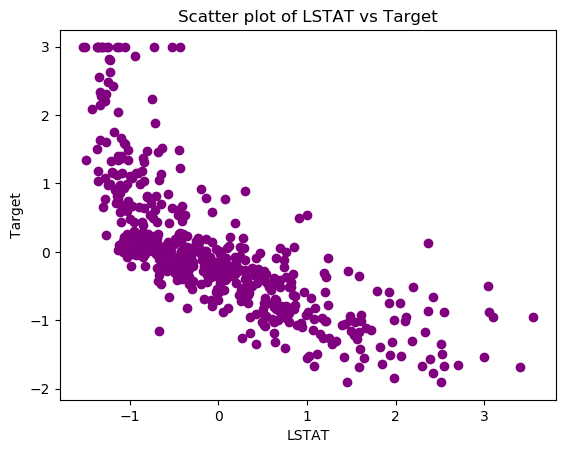

In [21]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)
for column in X.columns:
    plt.scatter(X[column], y, color='purple')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.title('Scatter plot of ' + column + ' vs Target')
    plt.show()

در نمودارهایی که رابطه‌ی نسبتا خطی بین ورودی و مقدار هدف وجود دارد، همبستگی داریم و در باقی نمودارها همبستگی وجود ندارد

## close form of Linear Regression
Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down close form of linear regression </li>
<li> 2-now use this close form to obtain good weight for this problem </li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    


Here we write down the close form of linear regression:
$$
E = \frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
$$\nabla E = 0 \Rightarrow -\phi^TY + \phi^T\phi W + \lambda W = 0$$
$$\Rightarrow W = (\phi^T\phi + \lambda I)^{-1}\phi^TY$$

In [4]:
#this is just template you are free to implement is however you want. add many cell as you wish
class LinearRegressionModel: #phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)


    def __init__(self,phi):
        self.phi = phi
        pass


    def fit(self,X,y,regularization):
        """
        get X and y train and learn the parameter by the equation.
    
        """
        self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(self.phi(X).T,self.phi(X))+regularization*np.identity(self.phi(X).shape[1])), self.phi(X).T), y)
        # return self.w
        
    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        yhat = self.transform(X)
        return np.mean((yhat-y)**2)
        pass
    def transform(self,X):
        """
        get X and calculate yhat as predicted values.
    
        """
        return np.matmul(self.phi(X),self.w)
        pass
    
    def get_param(self):
        "return w "
        return self.w
        pass

def show_data_by_feature(data, y, yhat, feature):
    title = str(feature) + " - Prediction"
    plt.figure(figsize=(15, 10))
    plt.scatter(data[feature], y, color="purple")
    plt.scatter(data[feature], yhat, color="green")
    plt.legend(["Real", "Predicted"])
    plt.title(title)
    plt.show()

def plot_error(X,y,yhat,title):
    plt.figure(figsize=(20,10))
    plt.scatter(X,y-yhat)
    plt.title(title)
    plt.show()

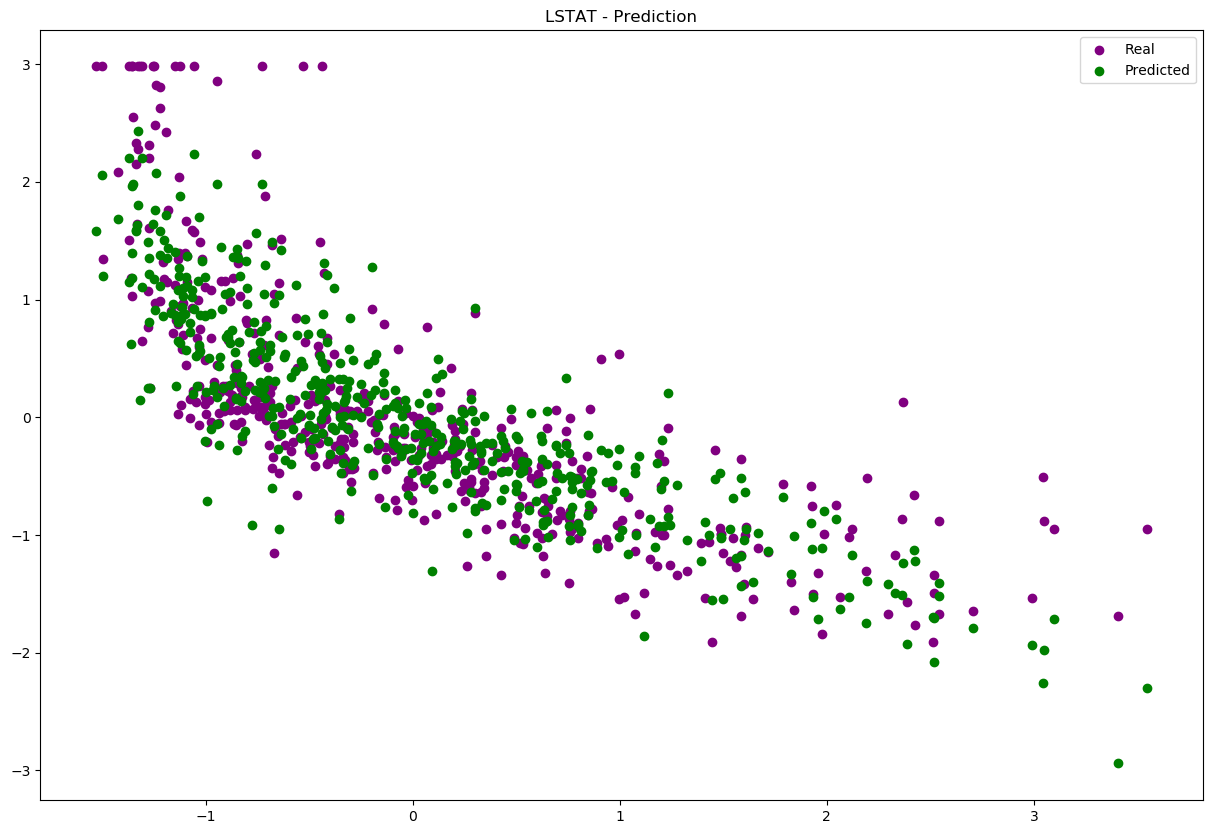

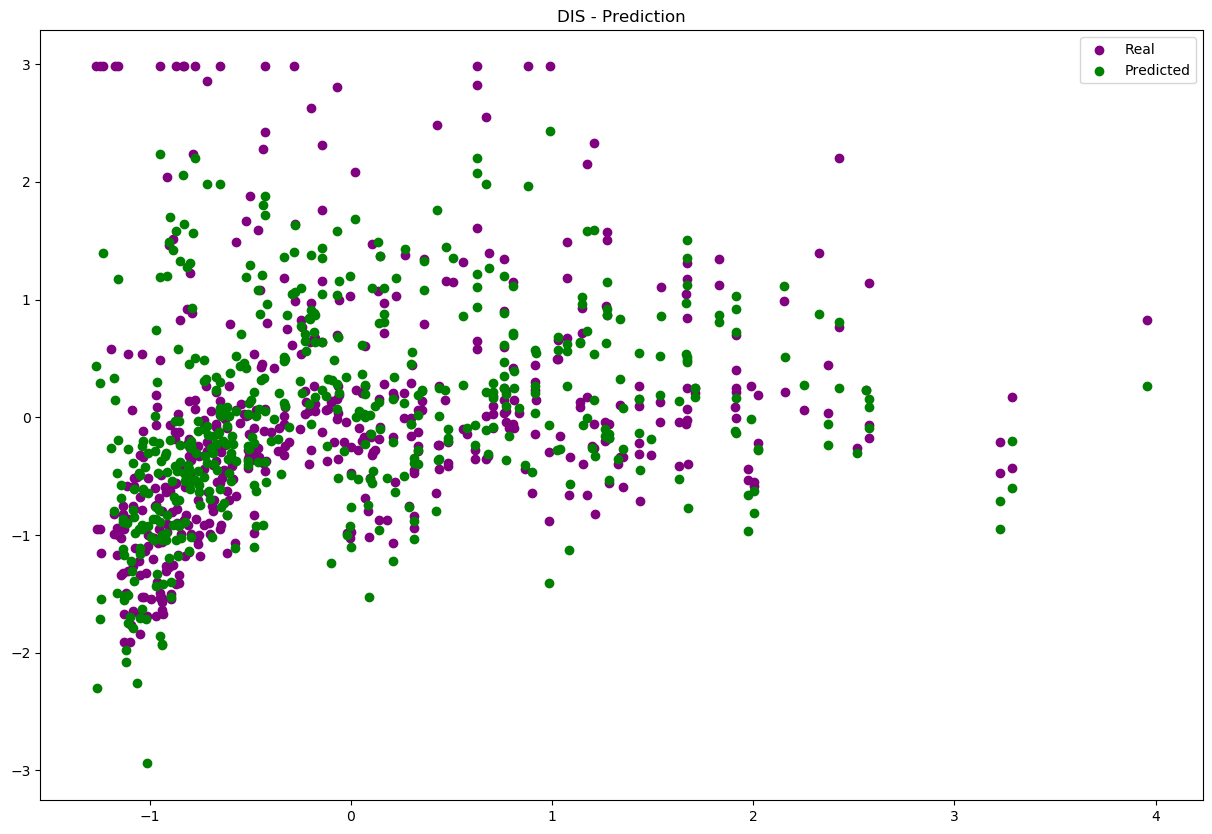

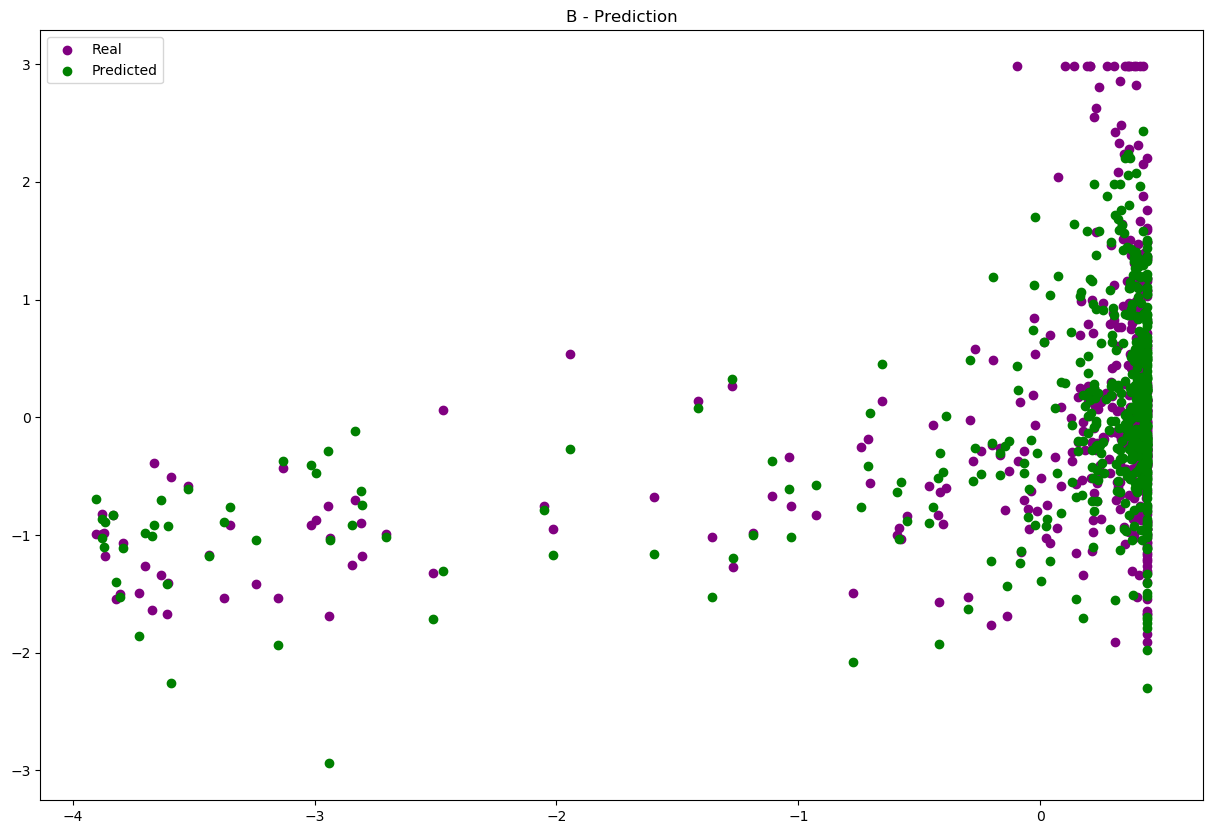

In [5]:
lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
lr.fit(X_train, y_train, 0)
yhat = lr.transform(X)
show_data_by_feature(X, y, yhat, "LSTAT")
show_data_by_feature(X, y, yhat, "DIS")
show_data_by_feature(X, y, yhat, "B")

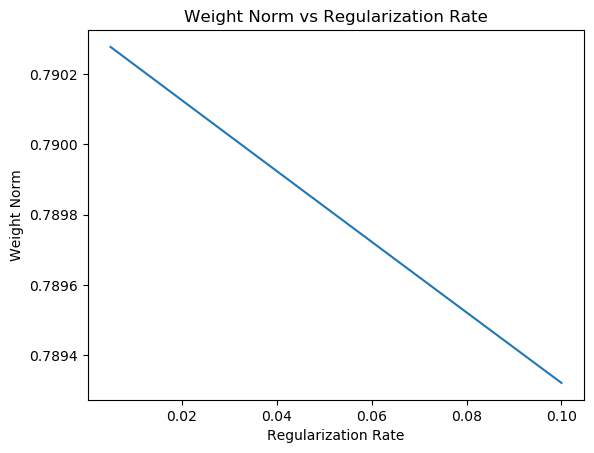

<Figure size 1000x1000 with 0 Axes>

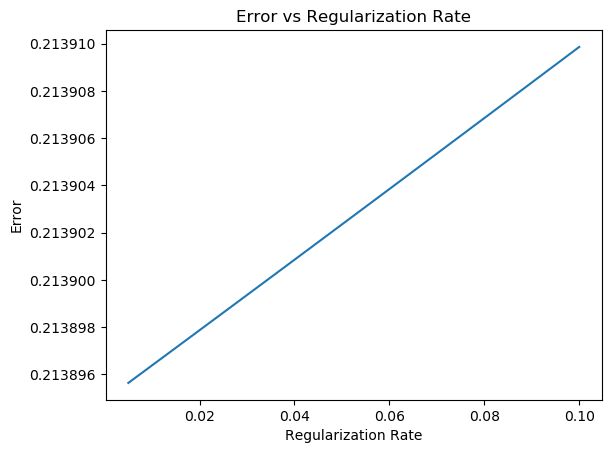

<Figure size 1000x1000 with 0 Axes>

In [6]:
reg_rates = np.linspace(0.005, 0.1, 20)
errors = []
weight_norms = []
for reg_rate in reg_rates:
    lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
    lr.fit(X_train, y_train, reg_rate)
    errors.append(lr.evaluate(X_test, y_test))
    weight_norms.append(np.linalg.norm(lr.get_param()))
plt.plot(reg_rates, weight_norms)
plt.xlabel("Regularization Rate")
plt.ylabel("Weight Norm")
plt.title("Weight Norm vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()
plt.plot(reg_rates, errors)
plt.xlabel("Regularization Rate")
plt.ylabel("Error")
plt.title("Error vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()

Explanation:

Error rate is increased because it seems that the model was too simple and it is Underfited. therefore adding Regularization term grows error rate. Additionally W slightly decreases by increasing the $\lambda$ parameter so the variance reduces.

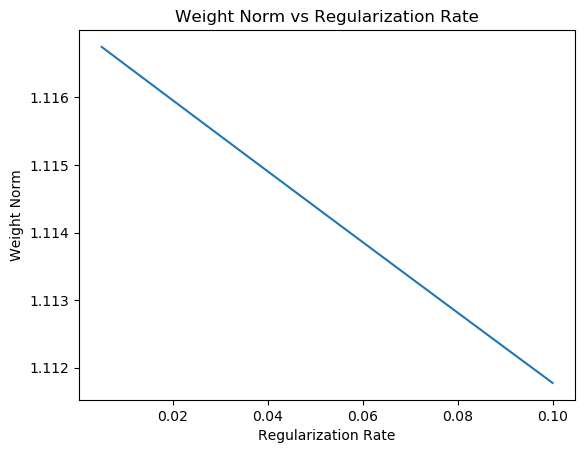

<Figure size 1000x1000 with 0 Axes>

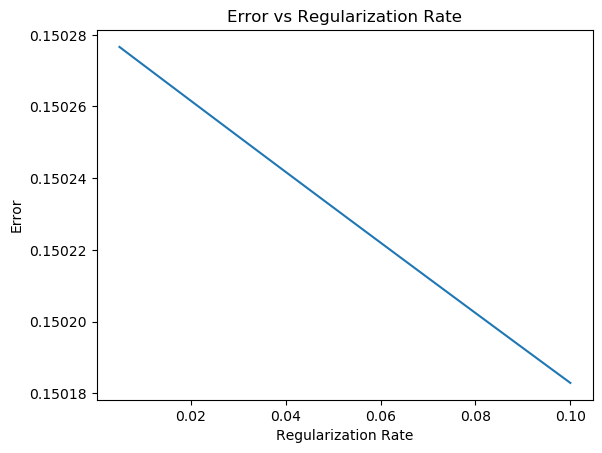

<Figure size 1000x1000 with 0 Axes>

In [7]:
reg_rates = np.linspace(0.005, 0.1, 20)
X_train_with_square = np.c_[X_train, X_train ** 2]
X_test_with_square = np.c_[X_test, X_test ** 2]
errors = []
weight_norms = []
for reg_rate in reg_rates:
    lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
    lr.fit(X_train_with_square, y_train, reg_rate)
    errors.append(lr.evaluate(X_test_with_square, y_test))
    weight_norms.append(np.linalg.norm(lr.get_param()))
plt.plot(reg_rates, weight_norms)
plt.xlabel("Regularization Rate")
plt.ylabel("Weight Norm")
plt.title("Weight Norm vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()
plt.plot(reg_rates, errors)
plt.xlabel("Regularization Rate")
plt.ylabel("Error")
plt.title("Error vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()

Explanation:

As it's clear in the plot, by adding square of each feature to dataset, the model is not Underfited anymore and more features are fitted rather than the previous state. therefore by adding the Regularization term, the error rate decreases. still W decreases by increasing the $\lambda$ parameter so the variance reduces.

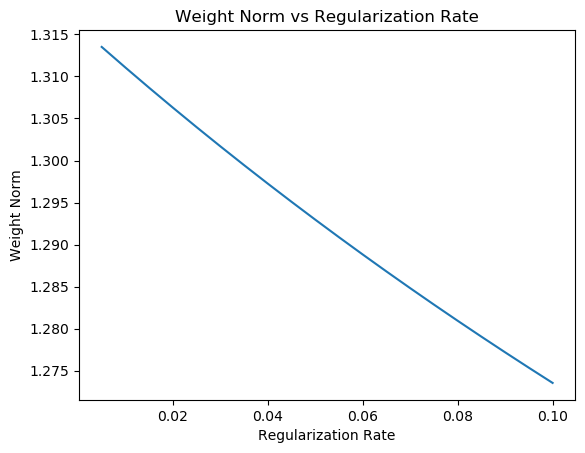

<Figure size 1000x1000 with 0 Axes>

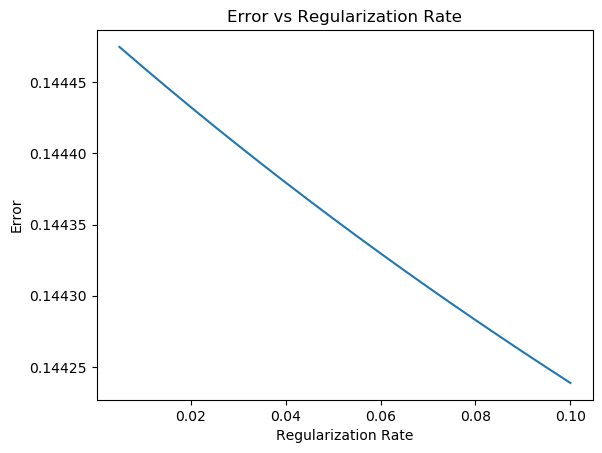

<Figure size 1000x1000 with 0 Axes>

In [8]:
reg_rates = np.linspace(0.005, 0.1, 20)
X_train_with_square = np.c_[X_train, X_train ** 2]
X_test_with_square = np.c_[X_test, X_test ** 2]
X_train_with_square_and_cube = np.c_[X_train_with_square, X_train ** 3]
X_test_with_square_and_cube = np.c_[X_test_with_square, X_test ** 3]
errors = []
weight_norms = []
for reg_rate in reg_rates:
    lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
    lr.fit(X_train_with_square_and_cube, y_train, reg_rate)
    errors.append(lr.evaluate(X_test_with_square_and_cube, y_test))
    weight_norms.append(np.linalg.norm(lr.get_param()))
plt.plot(reg_rates, weight_norms)
plt.xlabel("Regularization Rate")
plt.ylabel("Weight Norm")
plt.title("Weight Norm vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()
plt.plot(reg_rates, errors)
plt.xlabel("Regularization Rate")
plt.ylabel("Error")
plt.title("Error vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()

Explanation:


Likely to the last model, by adding square of each feature to dataset, not only the model is not Underfited anymore and more features are fitted rather than the previous state, but also it seems to be Overfitted. therefore by adding the Regularization term, the error rate decreases. still W decreases by increasing the $\lambda$ parameter so the variance reduces.

Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down gradient descent update formulation </li>
<li> 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method</li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    

# gradient descent with best learning rate

$$
E = \frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
$$while(i<steps):$$
$$\;\;\;\;\;\;\;\;\;\;\;\;\;\;W = W - \eta \nabla E$$

From Taylor's approximation:
$$l(w+s) \approx l(w) + g(w)^Ts$$
$$l(w+s) \approx l(w) + g(w)^Ts + \frac{1}{2}s^TH(w)s$$
Where $l(w)$ is the loss function, $g(w)=\nabla l(w)$ is the gradient and $H(w) = \nabla^2l(w)$ is the Hessian of l.

Now, to find best s, we solve the following optimization problem:
$$\arg\min_{s} l(w) + g(w)^Ts + \frac{1}{2}s^TH(w)s$$
$$\Rightarrow \frac{\partial l(w+s)}{\partial s} = \frac{\partial}{\partial s}(l(w) + g(w)^Ts + \frac{1}{2}s^TH(w)s) = 0$$
$$\Rightarrow g(w) + H(w)s = 0 \Rightarrow \boxed{s = -[H(w)]^{-1}g(w)}$$

Meanwhile, for calculating Hessian:
$$ E = \frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW $$
$$H(W) = \nabla^2E(W) \Rightarrow \boxed{H(W) = \phi^T\phi + \lambda I}$$

In [9]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

In [10]:
#this is just template you are free to implement is however you want.
class LinearRegressionModel:#phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self,phi):
        self.phi = phi
        pass
    
    def fit(self,X,y,reg_rate,steps=10):
        """
        get X and y train and learn the parameter by the gradient descent.
    
        """
        self.w = np.zeros(X.shape[1] + 1)
        for i in range(steps):
                self.w = self.w - np.matmul(self.obtain_learning_rate(self.phi(X), reg_rate), self.grad(self.phi(X), y, reg_rate))
        pass

    def obtain_learning_rate(self,phi, reg_rate):
        """
        get phi and reg_rate and return learning rate.
        """
        return np.linalg.inv(np.matmul(phi.T, phi) + reg_rate * np.identity(phi.shape[1]))
        pass

    def grad(self, phi, y, reg_rate):
        """
        get X and y and calculate the gradient of the error function.
        """
        return np.matmul(np.matmul(phi.T, phi), self.get_param()) - np.matmul(phi.T, y) + reg_rate * self.get_param()
        pass

    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        yhat = self.transform(X)
        return np.mean((yhat-y)**2)
        pass
    def transform(self,X):
        """
        get X and calculate yhat as predicted values.
    
        """
        return np.matmul(self.phi(X), self.w)
        pass

    def get_param(self):
        """
        return the parameter of the model.
        """
        return self.w
        pass


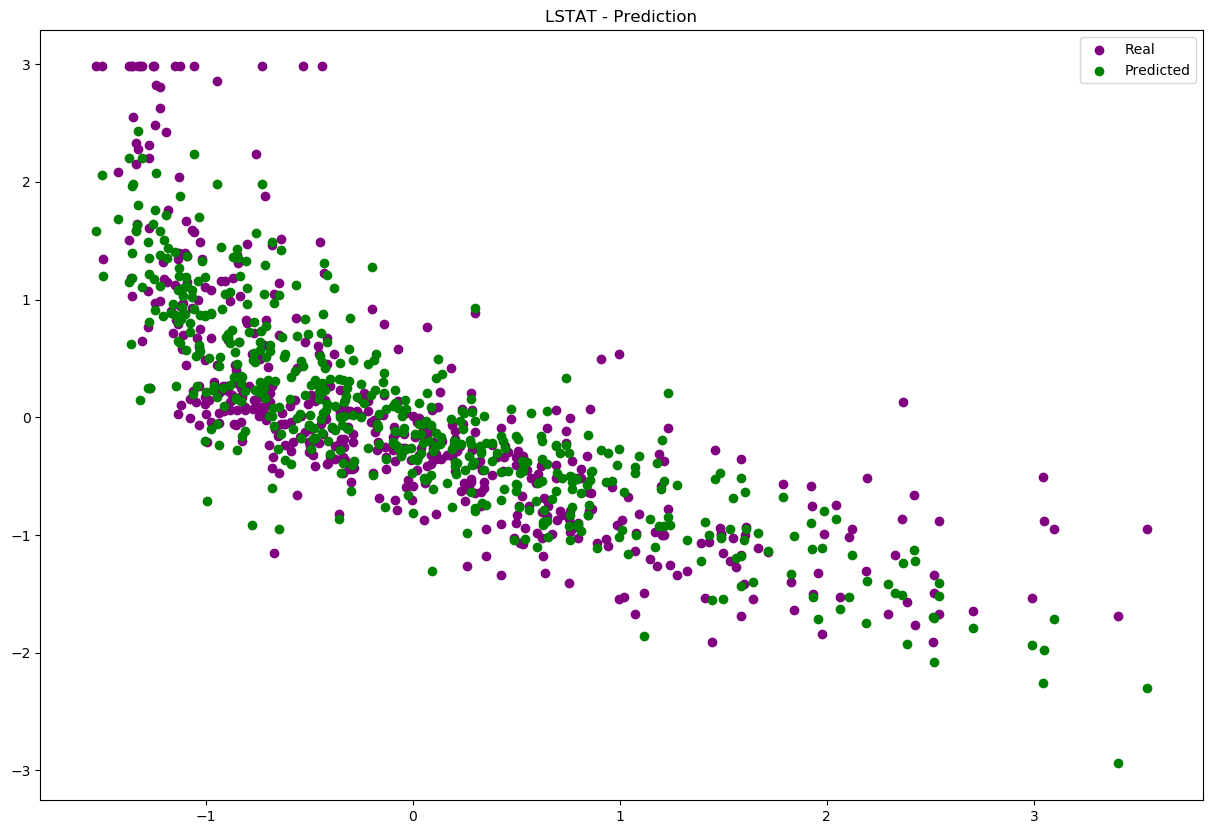

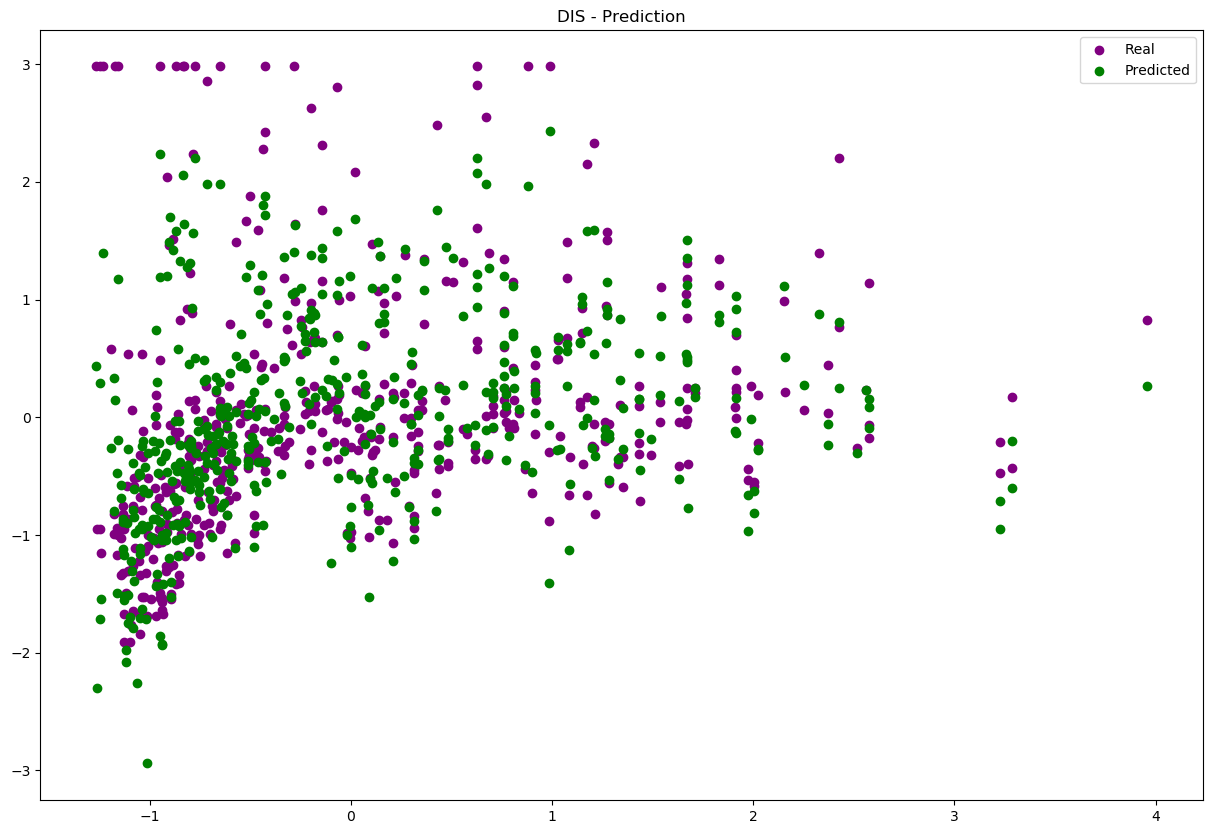

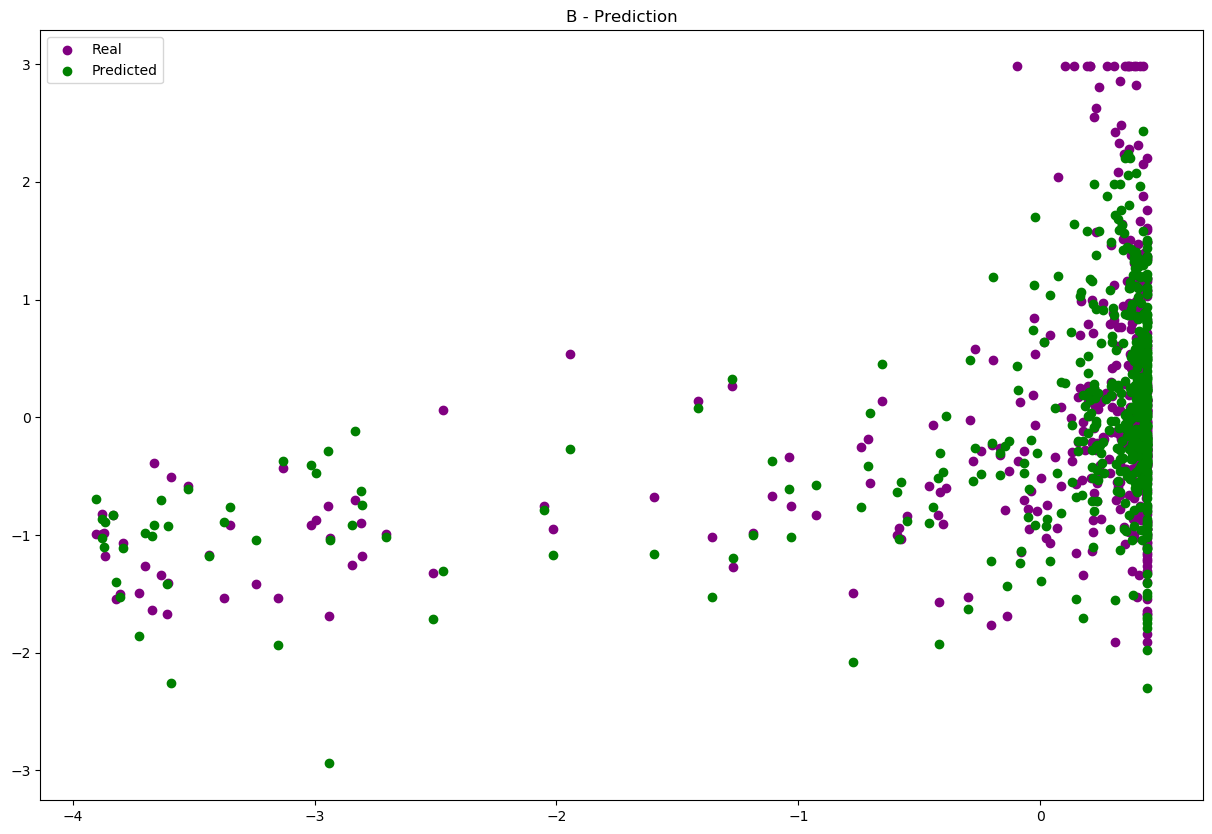

In [11]:
lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
lr.fit(X_train, y_train, 0.01, 1000)
yhat = lr.transform(X)
show_data_by_feature(X, y, yhat, "LSTAT")
show_data_by_feature(X, y, yhat, "DIS")
show_data_by_feature(X, y, yhat, "B")

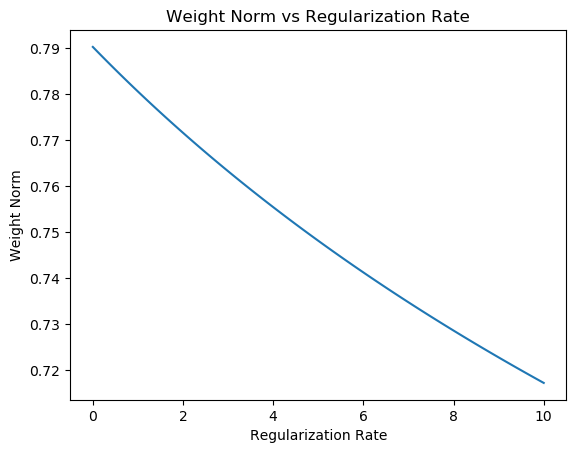

<Figure size 1000x1000 with 0 Axes>

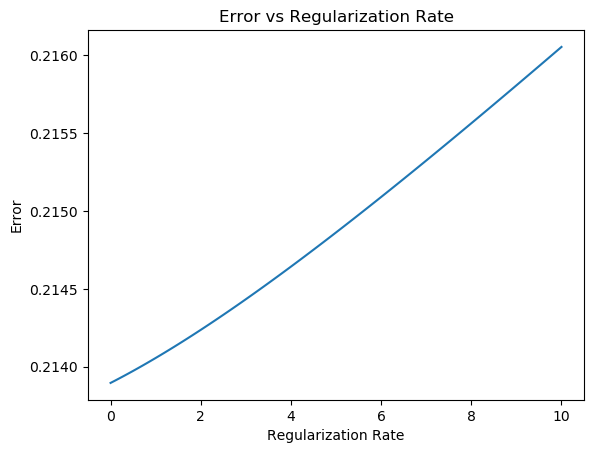

<Figure size 1000x1000 with 0 Axes>

In [12]:
reg_rates = np.linspace(0, 10, 101)
errors = []
weight_norms = []
for reg_rate in reg_rates:
    lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
    lr.fit(X_train, y_train, reg_rate)
    errors.append(lr.evaluate(X_test, y_test))
    weight_norms.append(np.linalg.norm(lr.get_param()))
plt.plot(reg_rates, weight_norms)
plt.xlabel("Regularization Rate")
plt.ylabel("Weight Norm")
plt.title("Weight Norm vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()
plt.plot(reg_rates, errors)
plt.xlabel("Regularization Rate")
plt.ylabel("Error")
plt.title("Error vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()

Explanation:

Error rate is increased because it seems that the model was too simple and it is Underfited. therefore adding Regularization term grows error rate. Additionally W slightly decreases by increasing the $\lambda$ parameter so the variance reduces.

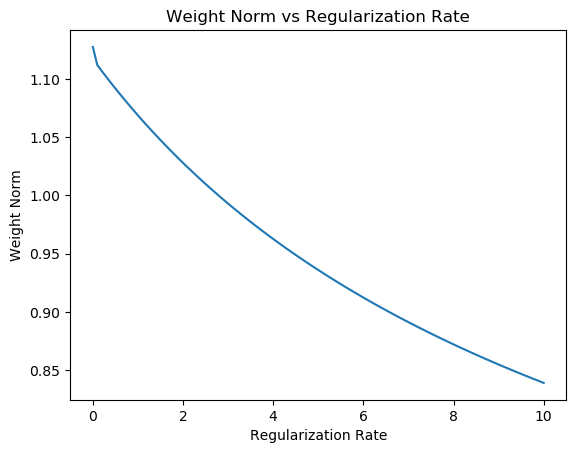

<Figure size 1000x1000 with 0 Axes>

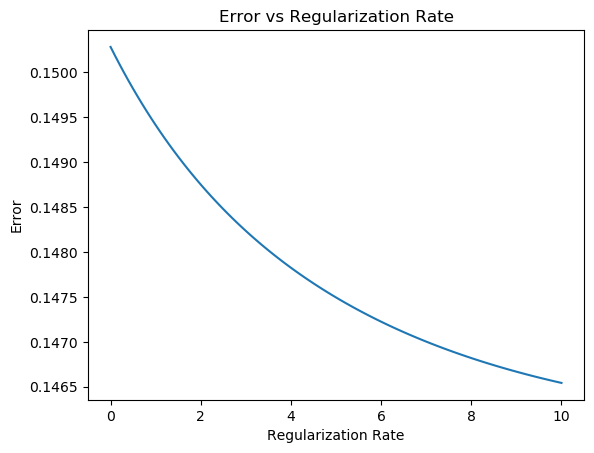

<Figure size 1000x1000 with 0 Axes>

In [13]:
reg_rates = np.linspace(0, 10, 101)
X_train_with_square = np.c_[X_train, X_train ** 2]
X_test_with_square = np.c_[X_test, X_test ** 2]
errors = []
weight_norms = []
for reg_rate in reg_rates:
    lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
    lr.fit(X_train_with_square, y_train, reg_rate)
    errors.append(lr.evaluate(X_test_with_square, y_test))
    weight_norms.append(np.linalg.norm(lr.get_param()))
plt.plot(reg_rates, weight_norms)
plt.xlabel("Regularization Rate")
plt.ylabel("Weight Norm")
plt.title("Weight Norm vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()
plt.plot(reg_rates, errors)
plt.xlabel("Regularization Rate")
plt.ylabel("Error")
plt.title("Error vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()

Explanation:

As it's clear in the plot, by adding square of each feature to dataset, the model is not Underfited anymore and more features are fitted rather than the previous state. therefore by adding the Regularization term, the error rate decreases. still W decreases by increasing the $\lambda$ parameter so the variance reduces.

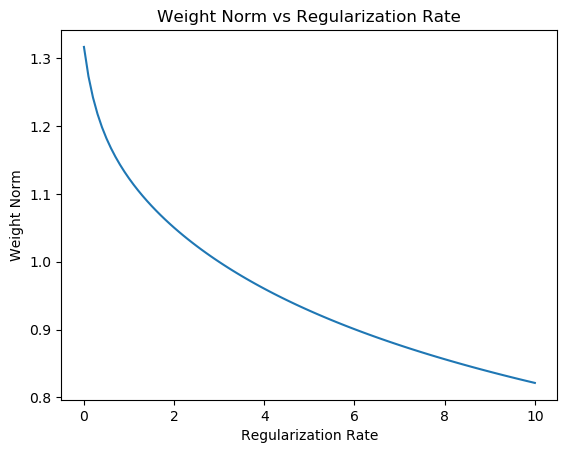

<Figure size 1000x1000 with 0 Axes>

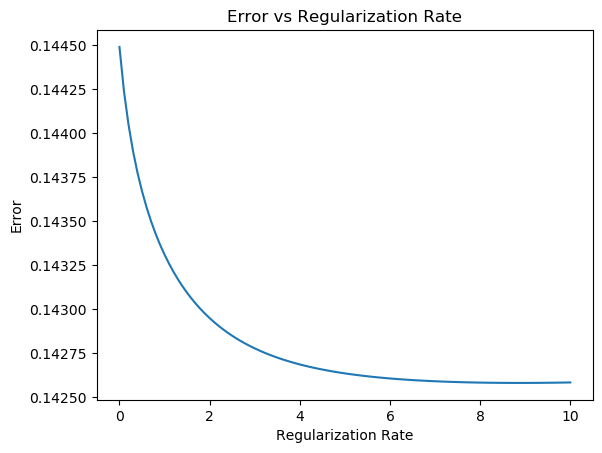

<Figure size 1000x1000 with 0 Axes>

In [14]:
reg_rates = np.linspace(0, 10, 101)
X_train_with_square = np.c_[X_train, X_train ** 2]
X_test_with_square = np.c_[X_test, X_test ** 2]
X_train_with_square_and_cube = np.c_[X_train_with_square, X_train ** 3]
X_test_with_square_and_cube = np.c_[X_test_with_square, X_test ** 3]
errors = []
weight_norms = []
for reg_rate in reg_rates:
    lr = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
    lr.fit(X_train_with_square_and_cube, y_train, reg_rate)
    errors.append(lr.evaluate(X_test_with_square_and_cube, y_test))
    weight_norms.append(np.linalg.norm(lr.get_param()))
plt.plot(reg_rates, weight_norms)
plt.xlabel("Regularization Rate")
plt.ylabel("Weight Norm")
plt.title("Weight Norm vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()
plt.plot(reg_rates, errors)
plt.xlabel("Regularization Rate")
plt.ylabel("Error")
plt.title("Error vs Regularization Rate")
plt.figure(figsize=(10,10))
plt.show()

Explanation:

Likely to the last model, by adding square of each feature to dataset, not only the model is not Underfited anymore and more features are fitted rather than the previous state, but also it seems to be Overfitted. therefore by adding the Regularization term, the error rate decreases. still W decreases by increasing the $\lambda$ parameter so the variance reduces.